In [1]:
# Data handling
import pandas as pd
import numpy as np

# Basic visualization
import matplotlib.pyplot as plt

# Interactive visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as py

py.init_notebook_mode(connected=True)
pio.renderers.default = "colab"


In [3]:
dataset2 = pd.read_csv("covid_grouped.csv")
dataset2.head()


Date Country/Region Province/State  Confirmed  Recovered  Deaths
0  2020-01-22    Afghanistan            NaN          0        0.0       0
1  2020-01-23    Afghanistan            NaN          0        0.0       0
2  2020-01-24    Afghanistan            NaN          0        0.0       0
3  2020-01-25    Afghanistan            NaN          0        0.0       0
4  2020-01-26    Afghanistan            NaN          0        0.0       0

In [4]:
dataset2["Date"] = pd.to_datetime(dataset2["Date"])
dataset2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            231744 non-null  datetime64[ns]
 1   Country/Region  231744 non-null  object        
 2   Province/State  72624 non-null   object        
 3   Confirmed       231744 non-null  int64         
 4   Recovered       218688 non-null  float64       
 5   Deaths          231744 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 10.6+ MB


In [5]:
global_daily = dataset2.groupby("Date")[["Confirmed", "Deaths", "Recovered"]].sum()
global_daily.head()


Confirmed  Deaths  Recovered
Date                                    
2020-01-22        557      17       30.0
2020-01-23        657      18       32.0
2020-01-24        944      26       39.0
2020-01-25       1437      42       42.0
2020-01-26       2120      56       56.0

In [6]:
px.line(
    global_daily,
    y="Confirmed",
    title="Global COVID-19 Confirmed Cases Over Time",
    height=500
)


In [7]:
px.line(
    global_daily,
    y="Confirmed",
    title="Global COVID-19 Confirmed Cases Over Time (Log Scale)",
    height=500,
    log_y=True
)


In [8]:
px.line(
    global_daily,
    y=["Confirmed", "Deaths", "Recovered"],
    title="Global COVID-19: Confirmed vs Deaths vs Recovered Over Time",
    height=500
)


In [9]:
df_us = dataset2[dataset2["Country/Region"] == "US"]
df_us.head()


Date Country/Region Province/State  Confirmed  Recovered  Deaths
208896 2020-01-22             US            NaN          1        0.0       0
208897 2020-01-23             US            NaN          1        0.0       0
208898 2020-01-24             US            NaN          2        0.0       0
208899 2020-01-25             US            NaN          2        0.0       0
208900 2020-01-26             US            NaN          5        0.0       0

In [11]:
px.line(
    df_us,
    x="Date",
    y="Deaths",
    title="COVID-19 Deaths Over Time in the United States",
    height=400
)


In [12]:
df_us = df_us.sort_values("Date")
df_us["New_Cases"] = df_us["Confirmed"].diff()
df_us.head()


Date Country/Region Province/State  Confirmed  Recovered  Deaths  \
208896 2020-01-22             US            NaN          1        0.0       0   
208897 2020-01-23             US            NaN          1        0.0       0   
208898 2020-01-24             US            NaN          2        0.0       0   
208899 2020-01-25             US            NaN          2        0.0       0   
208900 2020-01-26             US            NaN          5        0.0       0   

        New_Cases  
208896        NaN  
208897        0.0  
208898        1.0  
208899        0.0  
208900        3.0

In [13]:
px.line(
    df_us,
    x="Date",
    y="New_Cases",
    title="Daily New COVID-19 Cases in the United States",
    height=500
)


In [14]:
df_us["New_Cases_7Day_Avg"] = df_us["New_Cases"].rolling(window=7).mean()
df_us.head(10)


Date Country/Region Province/State  Confirmed  Recovered  Deaths  \
208896 2020-01-22             US            NaN          1        0.0       0   
208897 2020-01-23             US            NaN          1        0.0       0   
208898 2020-01-24             US            NaN          2        0.0       0   
208899 2020-01-25             US            NaN          2        0.0       0   
208900 2020-01-26             US            NaN          5        0.0       0   
208901 2020-01-27             US            NaN          5        0.0       0   
208902 2020-01-28             US            NaN          5        0.0       0   
208903 2020-01-29             US            NaN          6        0.0       0   
208904 2020-01-30             US            NaN          6        0.0       0   
208905 2020-01-31             US            NaN          8        0.0       0   

        New_Cases  New_Cases_7Day_Avg  
208896        NaN                 NaN  
208897        0.0                 NaN  
208898        1.0                 NaN  
208899        0.0                 NaN  
208900        3.0                 NaN  
208901        0.0                 NaN  
208902        0.0                 NaN  
208903        1.0            0.714286  
208904        0.0            0.714286  
208905        2.0            0.857143

In [15]:
px.line(
    df_us,
    x="Date",
    y="New_Cases_7Day_Avg",
    title="USA COVID-19 Daily New Cases (7-Day Rolling Average)",
    height=500
)


In [17]:
latest_date = dataset2["Date"].max()
latest_date


Timestamp('2022-04-16 00:00:00')

In [18]:
latest_data = dataset2[dataset2["Date"] == latest_date]
latest_data.head()


Date Country/Region Province/State  Confirmed  Recovered  Deaths
815  2022-04-16    Afghanistan            NaN     178387        0.0    7676
1631 2022-04-16        Albania            NaN     274462        0.0    3496
2447 2022-04-16        Algeria            NaN     265739        0.0    6874
3263 2022-04-16        Andorra            NaN      40709        0.0     153
4079 2022-04-16         Angola            NaN      99194        0.0    1900

In [19]:
px.choropleth(
    latest_data,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    color_continuous_scale="Blues",
    title="Global COVID-19 Confirmed Cases (Latest Date)"
)


In [20]:
px.choropleth(
    dataset2,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    animation_frame="Date",
    color_continuous_scale="Blues",
    title="Global Spread of COVID-19 Over Time"
)


In [21]:
dataset3 = pd.read_csv("coviddeath.csv")
dataset3.head()


date  World  Afghanistan  Africa  Albania  Algeria  Andorra  Angola  \
0  2020-01-22    NaN          NaN     NaN      NaN      NaN      NaN     NaN   
1  2020-01-23    NaN          NaN     NaN      NaN      NaN      NaN     NaN   
2  2020-01-24    NaN          NaN     NaN      NaN      NaN      NaN     NaN   
3  2020-01-25    NaN          NaN     NaN      NaN      NaN      NaN     NaN   
4  2020-01-26    NaN          NaN     NaN      NaN      NaN      NaN     NaN   

   Anguilla  Antigua and Barbuda  ...  Uruguay  Uzbekistan  Vanuatu  Vatican  \
0       NaN                  NaN  ...      NaN         NaN      NaN      NaN   
1       NaN                  NaN  ...      NaN         NaN      NaN      NaN   
2       NaN                  NaN  ...      NaN         NaN      NaN      NaN   
3       NaN                  NaN  ...      NaN         NaN      NaN      NaN   
4       NaN                  NaN  ...      NaN         NaN      NaN      NaN   

   Venezuela  Vietnam  Wallis and Futuna  Yemen  Zambia  Zimbabwe  
0        NaN      NaN                NaN    NaN     NaN       NaN  
1        NaN      NaN                NaN    NaN     NaN       NaN  
2        NaN      NaN                NaN    NaN     NaN       NaN  
3        NaN      NaN                NaN    NaN     NaN       NaN  
4        NaN      NaN                NaN    NaN     NaN       NaN  

[5 rows x 232 columns]

In [22]:
import pandas as pd

data = {
    "Condition": [
        "Influenza and pneumonia",
        "Respiratory failure",
        "Acute respiratory distress syndrome",
        "Cardiovascular disease",
        "Hypertension",
        "Diabetes",
        "Chronic kidney disease",
        "Sepsis",
        "Multiple organ failure",
        "Chronic lung disease",
        "Influenza and pneumonia",
        "Respiratory failure",
        "Cardiovascular disease",
        "Diabetes",
        "Hypertension",
        "Respiratory failure",
        "Influenza and pneumonia",
        "Chronic lung disease",
        "Cardiovascular disease",
        "Sepsis"
    ]
}

dataset3 = pd.DataFrame(data)
dataset3.head()


Condition
0              Influenza and pneumonia
1                  Respiratory failure
2  Acute respiratory distress syndrome
3               Cardiovascular disease
4                         Hypertension

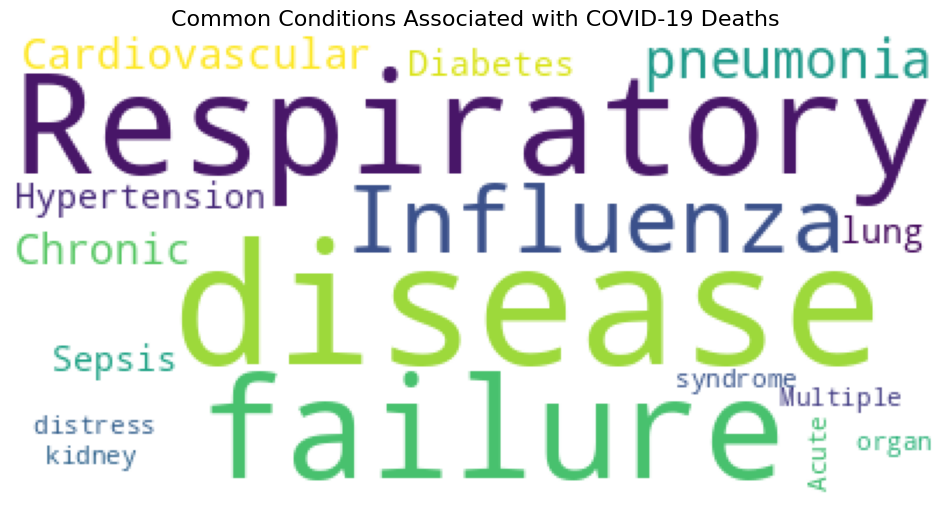

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(dataset3["Condition"])

plt.figure(figsize=(12, 12))
plt.imshow(WordCloud(background_color="white").generate(text))
plt.axis("off")
plt.title("Common Conditions Associated with COVID-19 Deaths", fontsize=16)
plt.show()


In [10]:
px.line(
    df_us,
    x="Date",
    y="Confirmed",
    title="COVID-19 Confirmed Cases Over Time in the United States",
    height=500
)


In [ ]:
dataset1 = pd.read_csv("covid.csv")
dataset1.head()


In [ ]:
dataset1.shape


In [ ]:
dataset1 = dataset1[
    [
        "location",
        "continent",
        "population",
        "total_cases",
        "total_deaths",
        "total_tests",
        "iso_code"
    ]
]

dataset1.head()


In [ ]:
dataset1 = dataset1[dataset1["continent"].notna()]
dataset1.head()


In [ ]:
dataset1["total_tests"] = dataset1["total_tests"].fillna(0)
dataset1.head()


In [ ]:
# Sort countries by total cases (descending)
top10_cases = dataset1.sort_values(
    by="total_cases",
    ascending=False
).head(10)

top10_cases


In [ ]:
px.bar(
    top10_cases,
    x="location",
    y="total_cases",
    color="total_cases",
    title="Top 10 Countries by Total COVID-19 Cases",
    height=500
)


In [ ]:
px.bar(
    top10_cases,
    x="location",
    y="total_cases",
    color="total_deaths",
    title="Top 10 Countries: Total Cases vs Total Deaths",
    hover_data=["continent", "total_deaths"],
    height=500
)


In [ ]:
px.scatter(
    top10_cases,
    x="total_cases",
    y="total_deaths",
    size="total_deaths",
    color="continent",
    hover_name="location",
    title="Top 10 Countries: Total Cases vs Total Deaths",
    size_max=60
)


In [ ]:
px.scatter(
    top10_cases,
    x="total_cases",
    y="total_deaths",
    size="total_deaths",
    color="continent",
    hover_name="location",
    title="Top 10 Countries: Total Cases vs Total Deaths (Log Scale)",
    size_max=60,
    log_x=True,
    log_y=True
)


In [ ]:
px.scatter(
    dataset1,
    x="continent",
    y="total_cases",
    size="total_cases",
    color="continent",
    hover_name="location",
    title="Continent-wise Distribution of Total COVID-19 Cases",
    size_max=50
)


In [ ]:
dataset1 = dataset1.dropna(subset=["total_cases"])
dataset1 = dataset1.reset_index(drop=True)


In [ ]:
dataset1["total_cases"].isna().sum()


In [ ]:
px.scatter(
    dataset1,
    x="continent",
    y="total_cases",
    size="total_cases",
    color="continent",
    hover_name="location",
    title="Continent-wise Distribution of Total COVID-19 Cases",
    size_max=50
)
